### Spam Ham classification using Decision Trees

#### 1. Data Preprocessing
Means, we have to load the data, look into it, and perform the preprocessing (cleaning) if requried.

In [1]:
# importing  libraries to do EDA
import pandas as pd
import os
import numpy as np

reading the dataset and storing as pandas dataframe

In [2]:
df = pd.read_csv(os.path.join(os.getcwd(), "datasets", "spamhamdata.csv"), encoding="utf-8")

In [3]:
# let's see couple of rows in dataset
df.head(2)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34',
       'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37'],
      dtype='object')

so many columns are showing here, basically those might be because of split of the value in csv, 
so we will make only two columns first for sms_category (spam/ham) and another one as sms_text

In [5]:
# we know v1 is the category so will rename that
df["v1"].value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

In [6]:
df.rename(columns={"v1": "sms_category", "v2":"sms_text"}, inplace=True) # inplace=True will make the changes in df
df.columns 

Index(['sms_category', 'sms_text', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
       'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37'],
      dtype='object')

okay, so we saw we had NaN as a value for most of the unwanted columns, so let's remove those and concat with sms_text column

In [7]:
# replacing the np.nan with nothing and apllyig the changes 
df.replace(np.nan, '', inplace=True)
df.head(2)

,sms_category,sms_text,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
0,ham,"Go until jurong point, crazy.. Available only ...",,,,,,,,,...,,,,,,,,,,
1,ham,Ok lar... Joking wif u oni...,,,,,,,,,...,,,,,,,,,,


In [8]:
# let's cpmbined the values 
# so iloc[:,:]; first colon is for rows, and second colon is for column selection
df["combined_values"] = df.iloc[:,1:].apply(lambda x: ' '.join(x.astype(str) ), axis=1)

so we got the combined text, now will retain only two columns from df

In [9]:
df = df[["sms_category", "combined_values"]].rename(columns={"combined_values":"sms_text"}).reset_index(drop=True)

In [10]:
df.head(2)

,sms_category,sms_text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni... ...


superb! now let's clean the sms_text by removing punctuations and stop words, etc. 

In [11]:
# as applymap has deprecated, will use map; it will take each element and does the transformation
df = df.map(lambda x:  x.lower()) 
df.head(2)

,sms_category,sms_text
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni... ...


In [12]:
# first will remove the punctuations
import string

In [13]:
punctuations = list(string.punctuation)

def remove_punctuations(x:str):
    x = list(x)
    for p in punctuations:
        try:
            x.remove(p)
        except Exception as _:
            pass

    return ' '.join(''.join(x).split()) # removing any whitespaces 

In [14]:
# here we are calling the method directly upon the column, thus we do not need to specify the axis
df["sms_text"] = df["sms_text"].apply(remove_punctuations) 
df.head(2)

,sms_category,sms_text
0,ham,go until jurong point crazy. available only in...
1,ham,ok lar.. joking wif u oni...


let's remove the stop words, as they do not add weight into the sentence, so to do so we will use nltk to remove the stop words

In [15]:
import nltk
from nltk.corpus import stopwords

In [16]:
# before using it we have to download that first
# nltk.download('stopwords')

In [17]:
# custom method to remove stopwords from the sms text
_stopwords = stopwords.words("english")
def remove_stopwords(x:str):
    return ' '.join([item for item in x.split() if item not in _stopwords])

In [18]:
df["sms_text"] = df["sms_text"].apply(remove_stopwords)
df.head(2)

,sms_category,sms_text
0,ham,go jurong point crazy. available bugis n great...
1,ham,ok lar.. joking wif u oni...


Nice! we have did basic preprocessing so far, and should be good to proceed further

#### 2. EDA - Exploratory Data Analysis
Means, we will understand the data by analyzing the relationship between features, importance of features etc.

In [19]:
df.head(2)

,sms_category,sms_text
0,ham,go jurong point crazy. available bugis n great...
1,ham,ok lar.. joking wif u oni...


since, we have only 1 feature thus, we can skip this operaion.

#### 3. Data Preperation for Model Train/Test
let's prepare the data, which model can understand (numerical)

In [20]:
# will first convert target variable
df["sms_category"].value_counts()

sms_category
ham     4825
spam     747
Name: count, dtype: int64

In [21]:
# converting spam and ham into numericals representation
df["sms_category"] = df["sms_category"].map({'ham':0, 'spam': 1})

In [22]:
df.head(2)

,sms_category,sms_text
0,0,go jurong point crazy. available bugis n great...
1,0,ok lar.. joking wif u oni...


perfect! now we have "sms_text" column, that is text, so we need, it's numerical represnetation and to do so, we are going to use very effective tf-idf vectorization

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
# max_features :  limits the mazimum number of words to be consider
# ngram_range : considered single words (1,1) or pairs of words(1,2) 
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2) )

In [25]:
X = tfidf_vectorizer.fit_transform(df["sms_text"])

In [26]:
X.shape

(5572, 5000)

In [29]:
y = df["sms_category"]

In [27]:
# so this is very small and simple dataset, but will see what we can analyze here
df["sms_category"].value_counts()

sms_category
0    4825
1     747
Name: count, dtype: int64

No!!! given data set is very imbalance data set. If we train the model with this dataset, then definetly it would be biased towards ham

In [28]:
from imblearn.over_sampling import SMOTE # to balanced, imbalanced dataset
from collections import Counter
from sklearn.model_selection import train_test_split

In [30]:
# let's fist split the test and train data
# stratify : splits the train and test into sub set in random fashion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y )

In [31]:
print("Original training set distribution", Counter(y_train))

Original training set distribution Counter({0: 3859, 1: 598})


so, now are full dataset has been converted into numerical form, thus we can apply SMOTE to balance the dataset.

In [32]:
# let's balanced the dataset using SMOTE
smote = SMOTE(random_state=42) # random_state holds the randomness for the algo to pick the data


In [34]:
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [35]:
print("Resampled training set distribution after SMOTE", Counter(y_train_resampled))

Resampled training set distribution after SMOTE Counter({0: 3859, 1: 3859})


Awesome, now we can go ahead and train our model with resampled training data

#### 4. Model Training/Test
after data prep, let's proceed with training the model for classification. Here we are going to use Decision Tree classification model to classify the given text

In [37]:
# let's load the model
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# let's create the instance of the Dcision Tree Classifier
# there are multiple parameter that we can tune to get beter performance such as;
# max_depth, mim_samples_leaf
dt_classifier = DecisionTreeClassifier(random_state=42)

In [39]:
# let's train the model with resampled data
dt_classifier.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

Bingo!!! Training has been completed. Now, let's evaluate the model and try some classification.

#### 5. Model Evaluation
Let's evaluate this classification model using metrix

In [63]:
import matplotlib.pyplot as plt

In [75]:
# let's load the required modules to get the report
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_recall_curve, ConfusionMatrixDisplay, roc_curve, RocCurveDisplay, PrecisionRecallDisplay, PredictionErrorDisplay

In [41]:
# let's first make the prediction on the original test data
y_pred = dt_classifier.predict(X_test)
y_prob = dt_classifier.predict_proba(X_test)[:,1] # probabilities for ROC AUC 

In [42]:
# accuracy score
accuracy_score(y_test, y_pred)

0.9560538116591928

In [68]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[945,  21],
       [ 28, 121]])

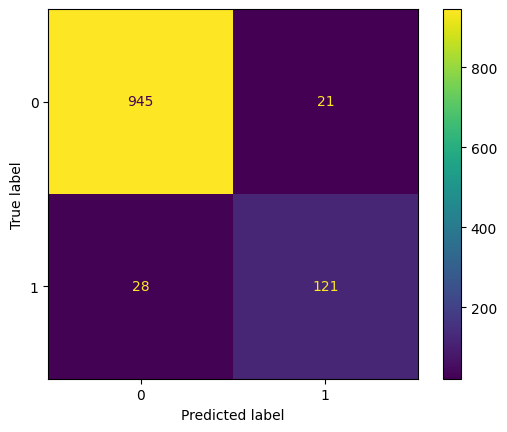

In [69]:
ConfusionMatrixDisplay(cm).plot()

<b>Precision:</b> Of all predicted 'spam', how many were actaully 'spam'

<b>Recall:</b> Of all actual 'spam', how many were correctly identified?

<b>F1-Score:</b> Harmonic mean of precision and recall

<b>Support:</b> Number of actual instances for each class in the test set

In [ ]:
# classification report
print(classification_report(y_pred, y_test, target_names=['ham', 'spam'])) # target will convert 0 to ham, 1 to spam

              precision    recall  f1-score   support

         ham       0.98      0.97      0.97       973
        spam       0.81      0.85      0.83       142

    accuracy                           0.96      1115
   macro avg       0.90      0.91      0.90      1115
weighted avg       0.96      0.96      0.96      1115



True Positives (TP): Instances where the actual class was positive and the model predicted it as positive.

False Positives (FP): Instances where the actual class was negative, but the model incorrectly predicted it as positive.

True Negatives (TN): Instances where the actual class was negative and the model correctly predicted it as negative.

False Negatives (FN): Instances where the actual class was positive, but the model incorrectly predicted it as negative

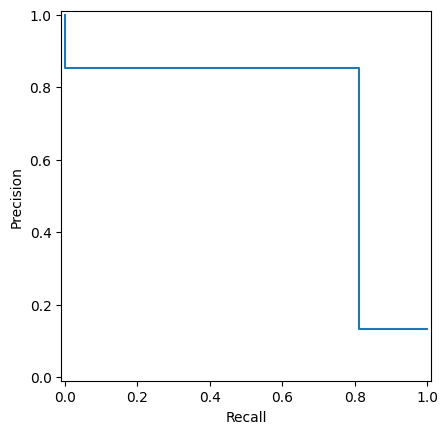

In [79]:
# heat map visualization

precision, recall, _ = precision_recall_curve(y_test, y_pred)
PrecisionRecallDisplay(precision=precision, recall=recall).plot()



The ROC AUC score, or Receiver Operating Characteristic Area Under the Curve, is a metric used to evaluate the performance of binary classification models. It represents the probability that a randomly chosen positive example will be ranked higher than a randomly chosen negative example by the model. The score ranges from 0 to 1, with 1 representing a perfect classifier and 0.5 indicating performance no better than random guessing. 

In [72]:
roc_auc_score(y_test, y_prob)

np.float64(0.8946357358233634)

d:\WorkSpace\data-science\.venv\Lib\site-packages\sklearn\metrics\_plot\roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


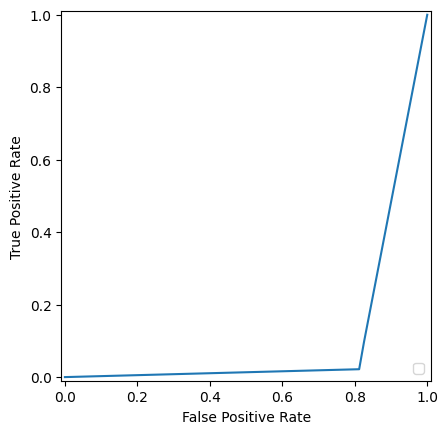

In [73]:
fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=0)
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

#### 6. Save the Model into Local
we need to save the model along with the tokenizer which we used for training the model, because that will help us predicting new data.

In [82]:
# let's save the model and tokenizer 
import joblib

In [83]:
# saving the model 
joblib.dump(dt_classifier, "spam_ham_classification.pkl")

['spam_ham_classification.pkl']

In [84]:
# saving the model's tokenizer
joblib.dump(tfidf_vectorizer, "tfidf_vectorizer.pkl")

['tfidf_vectorizer.pkl']

#### 7.  Prediction for new Text
let's load the models and tokenizer and perform the prediction for new text

In [115]:
loaded_dt_classifier = joblib.load("spam_ham_classification.pkl")
loaded_tfidf_vectorizer = joblib.load("tfidf_vectorizer.pkl")

In [125]:
new_text = "Bingo you have got selected for mega offer. Please send Yes to 565666 to claim the prize."

In [126]:
# now let's create the vector for new text
new_text_vectorized = loaded_tfidf_vectorizer.transform([new_text])

In [127]:
new_text_vectorized = new_text_vectorized.toarray()
new_text_vectorized.shape

(1, 5000)

In [128]:
# let'd predict with loaded model
loaded_dt_classifier.predict(new_text_vectorized)

array([0])

In [129]:
loaded_dt_classifier.predict_proba(new_text_vectorized)

array([[1., 0.]])